# Вариант 8
$e^{\bar x}$ является построенной по методу моментов оценкой для $e^{\mathbb E x} = e^{mp}$.

# 1.
Продемонстрируем асимптотическую нормальность с помощью графиков и критерия Шапиро-Уилка:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

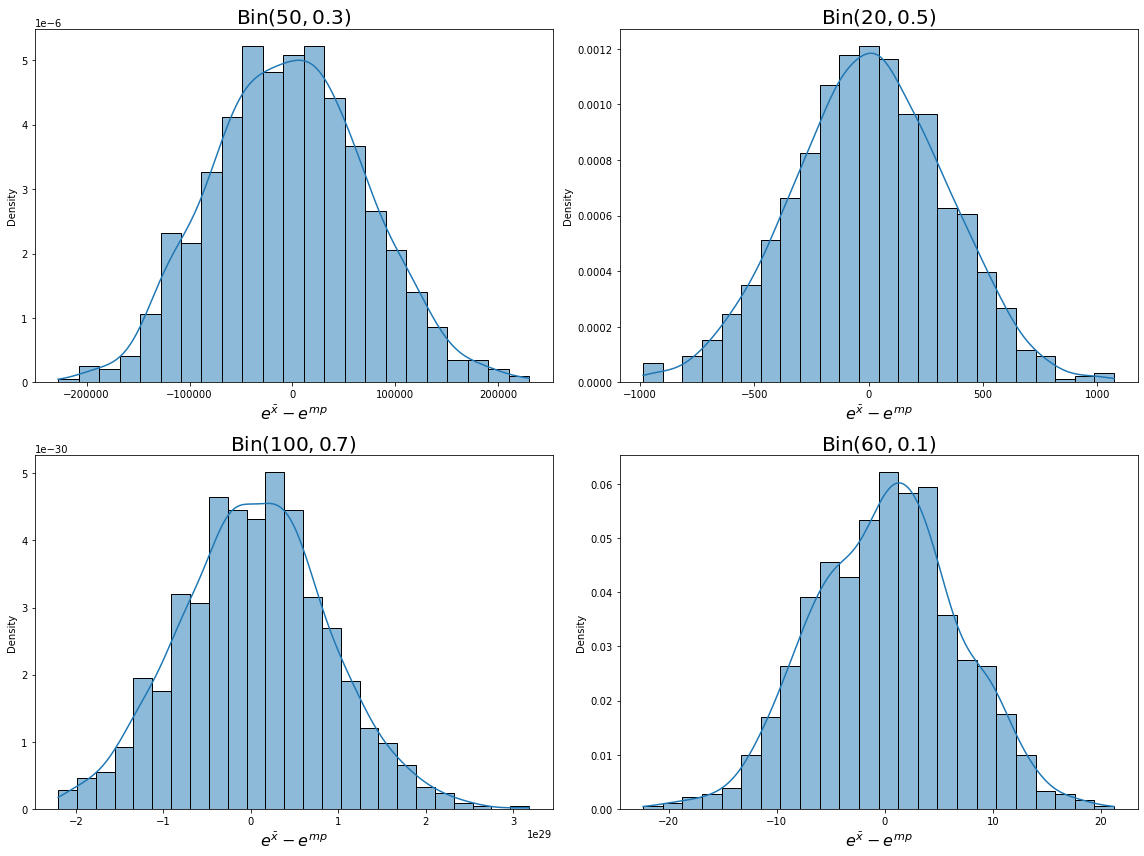

In [112]:
import numpy as np
from scipy.stats import binom

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange, tqdm
from IPython.display import Latex, display

n_samples = 1000
sample_size = 20000

params = [
    (50, 0.3),
    (20, 0.5),
    (100, 0.7),
    (60, 0.1)
]

np.random.seed(0)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
for index, (m, p) in enumerate(params):
    dist = binom(m, p)
    T = np.zeros(n_samples)

    for i in range(n_samples):
        X = dist.rvs(size=sample_size)
        T[i] = np.exp(X.mean()) - np.exp(m * p)
    
    ax = axs[index // 2, index % 2]
    sns.histplot(T, ax=ax, stat='density', kde=True)
    ax.set_title(rf"Bin(${m},{p}$)", fontsize=20)
    ax.set_xlabel(r"$e^{\bar x} - e^{mp}$", fontsize=16)
    
    result = shapiro(T[:100])
    display(Latex(rf"Bin(${m},{p}$): p={round(result.pvalue, 5)}"))
    
fig.tight_layout()

Распределение колоколообразное, а $p$-значение не достигает* магического значения 0.05/4**, что согласуется с предположением об асимптотической нормальности.

\* на самом деле критерий проверялся на подвыборке из 100 значений, потому что критерий Шапиро-Уилка мощный и при большой выборке (например, 1000) реагирует на самые слабые отклонения от нормальности... но на 100 значениях не будет видно колокола.

\** поправка Бонферонни при проверке 4-х гипотез.

# 2.
Проверим асимптотическую несмещённость. Для этого посмотрим на поведение разницы среднего значение этой статистики и $e^{mp}$ с увеличением объёма выборки.

1000it [00:48, 20.79it/s]


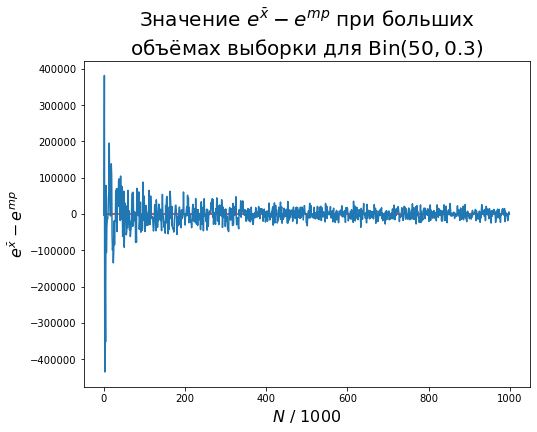

In [122]:
n_samples = 1000
sample_sizes = [i * 1000 for i in range(1, n_samples+1)]

m, p = 50, 0.3

np.random.seed(0)

dist = binom(m, p)
T = np.zeros(len(sample_sizes))

for i, sample_size in tqdm(enumerate(sample_sizes)):
    X = dist.rvs(size=sample_size)
    T[i] = np.exp(X.mean()) - np.exp(m * p)

fig, ax  = plt.subplots(figsize=(8, 6))
ax.plot(T)
#fig.tight_layout()
ax.set_xlabel(r'$N\ / \ 1000$', fontsize=16)
ax.set_ylabel(r'$e^{\bar x} - e^{mp}$', fontsize=16);
ax.set_title(r'Значение $e^{\bar x} - e^{mp}$ при больших' + '\nобъёмах выборки '
             + f'для Bin${m, p}$', fontsize=20);
ax.hlines(0, 0, n_samples, color='red');

Как видно, среднее значение разницы колеблется около 0, из чего можно предположить асимптотическую несмещённость.